In [1]:
import os
import scipy.io as sio 
import numpy as np

from operator import itemgetter

%matplotlib inline 
import matplotlib.pyplot as plt

In [50]:
DATA_PATH = '../../../datasets/data/train_raw/'

data_lm10             = sio.loadmat(os.path.join(DATA_PATH, 'LM10.mat'))
data_lm20_torquesteps = sio.loadmat(os.path.join(DATA_PATH, 'LM20_TorqueSteps.mat'))
data_lm30             = sio.loadmat(os.path.join(DATA_PATH, 'LM30.mat'))
data_lm45_torquesteps = sio.loadmat(os.path.join(DATA_PATH, 'LM45_TorqueSteps.mat'))
data_lm50             = sio.loadmat(os.path.join(DATA_PATH, 'LM50.mat'))
data_lm60_torquesteps = sio.loadmat(os.path.join(DATA_PATH, 'LM60_TorqueSteps.mat'))
data_lm68             = sio.loadmat(os.path.join(DATA_PATH, 'LM68.mat'))
data_spdvar           = sio.loadmat(os.path.join(DATA_PATH, 'NoLM_SpeedVariations.mat'))
data_spdvar2          = sio.loadmat(os.path.join(DATA_PATH, 'NoLM_SpeedVariations2.mat'))

In [29]:
statics_lm10             = [(0, 5), (6, 10), (11, 15), (16, 21), (23, 27), (28, 31), (32, 35), (38, 41)]
statics_lm20_torquesteps = [(0, 11), (12, 17), (18, 22), (24, 28), (30, 32), (34, 36), (38, 42), (44, 47),
                            (50, 54), (58, 65), (70, 81), (83, 87), (90, 91), (93, 95), (102, 109), 
                            (111, 116), (119, 126), (128, 130), (133, 141), (147, 153), (161, 173),
                            (175, 179), (182, 186), (189, 196), (198, 205)]
statics_lm30             = [(0, 4), (5, 9), (11, 16), (18, 22), (23, 27), (28, 31), (32, 36), (37, 41)]
statics_lm45_torquesteps = [(2, 7), (12, 16), (19, 22), (27, 29), (33, 40), (47, 53), (58, 63), (71, 73), 
                            (78, 82), (86, 90), (93, 98), (101, 107), (111, 113), (116, 117), (120, 125),
                            (127, 130), (134, 136), (138, 140), (142, 151), (153, 158), (161, 167), 
                            (172, 174), (177, 187), (191, 200), (201, 205)]
statics_lm50             = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 29), (31, 35), (36, 41)]
statics_lm60_torquesteps = [(0, 2), (3, 14), (17, 23), (26, 40), (42, 49), (52, 56), (59, 73), (74, 83),
                            (85, 93), (95, 103), (106, 121), (124, 136), (139, 149), (152, 165), (169, 182),
                            (184, 195), (197, 205)]
statics_lm68             = [(1, 6), (7, 12), (13, 18), (19, 25), (26, 30), (31, 41)]
statics_spdvar           = [(0, 3), (4, 12), (14, 20), (24, 37), (38, 45), (48, 56), (59, 73), (75, 77), (78, 83), (86, 96),
                            (98, 108), (108, 113), (117, 119), (121, 141), (143, 146), (151, 153), (155, 180), (182, 188),
                            (193, 197), (200, 205)]
statics_spdvar2          = [(0, 11), (34, 38), (80, 88), (108, 113), (119, 122), (124, 127), (129, 130), (132, 133), (135, 136), 
                            (138, 139), (141, 142), (143, 144), (146, 147), (148, 149), (151, 152), (153, 154), (155, 156), 
                            (157, 158), (161, 164)]

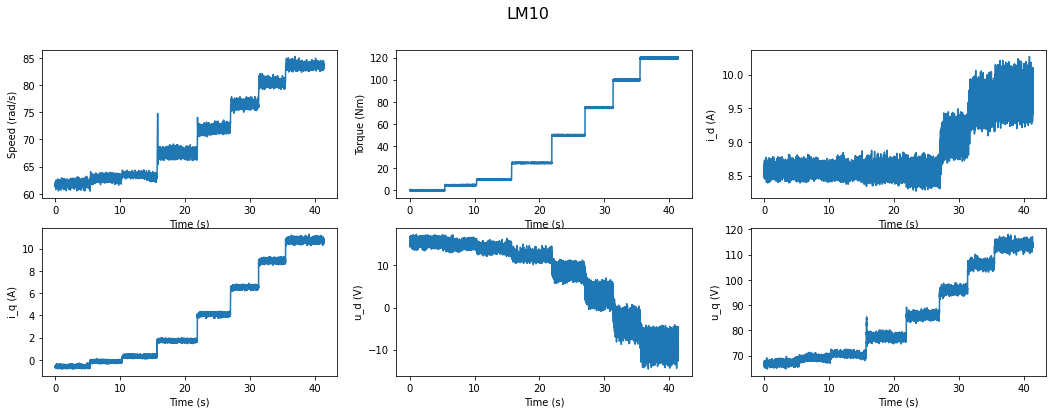

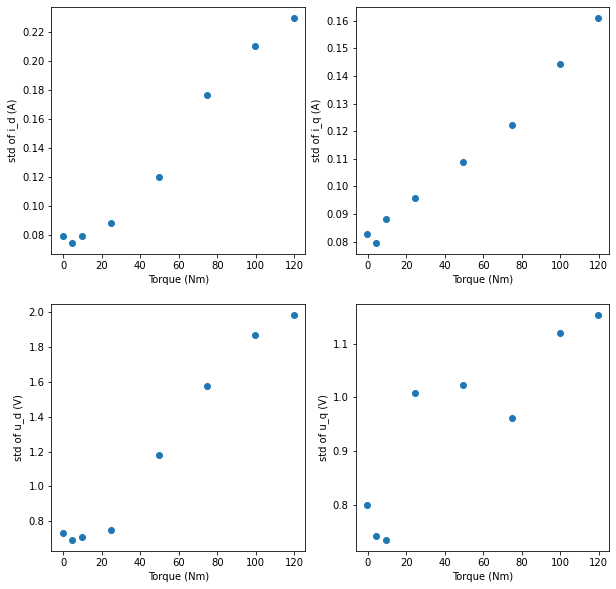

In [39]:
#Constant 10 Hz speed and 0-120 percentage Nominal Torque

data = data_lm10
statics = statics_lm10
title = 'LM10'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm10 = np.copy(values)
values_lm10 = values_lm10[~np.isnan(values_lm10).any(axis=1)]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

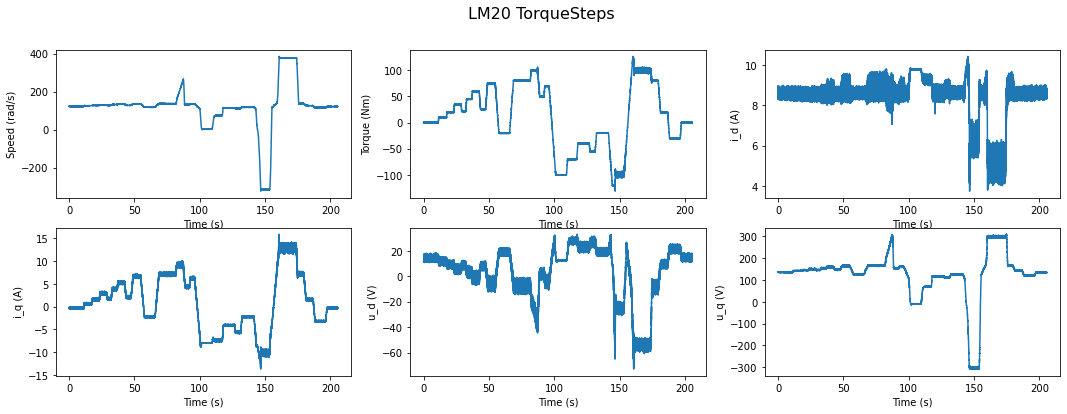

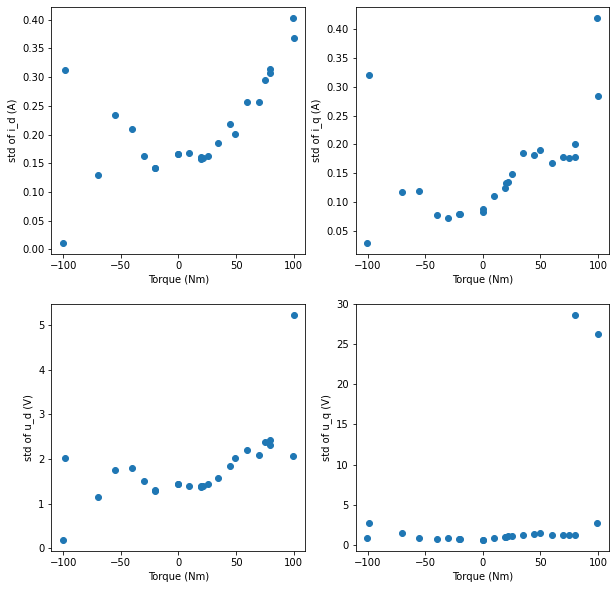

In [40]:
#Constant 20 Hz speed and torque steps

data = data_lm20_torquesteps
statics = statics_lm20_torquesteps
title = 'LM20 TorqueSteps'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm20_torquesteps = np.copy(values)
values_lm20_torquesteps = values_lm20_torquesteps[~np.isnan(values_lm20_torquesteps).any(axis=1)]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

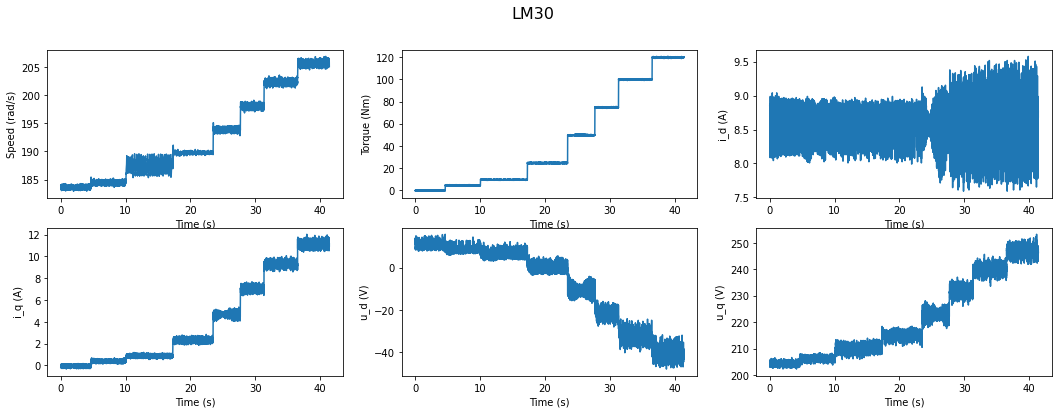

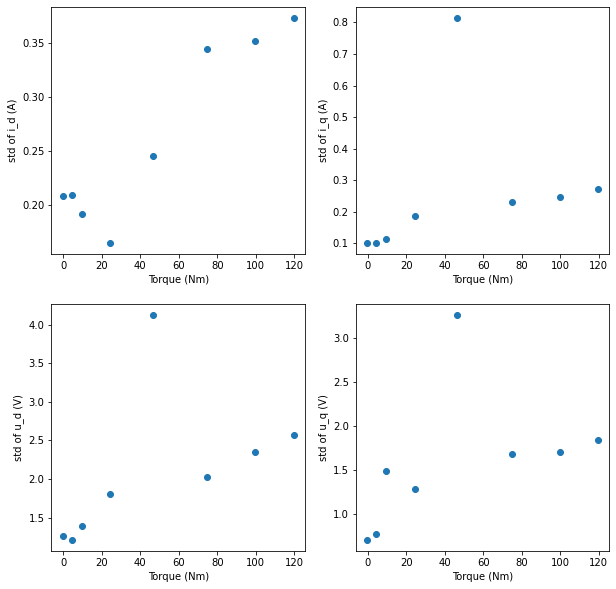

In [41]:
#Constant 30 Hz speed and 0-120 torque 

data = data_lm30
statics = statics_lm30
title = 'LM30'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm30 = np.copy(values)
values_lm30 = values_lm30[~np.isnan(values_lm30).any(axis=1)]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

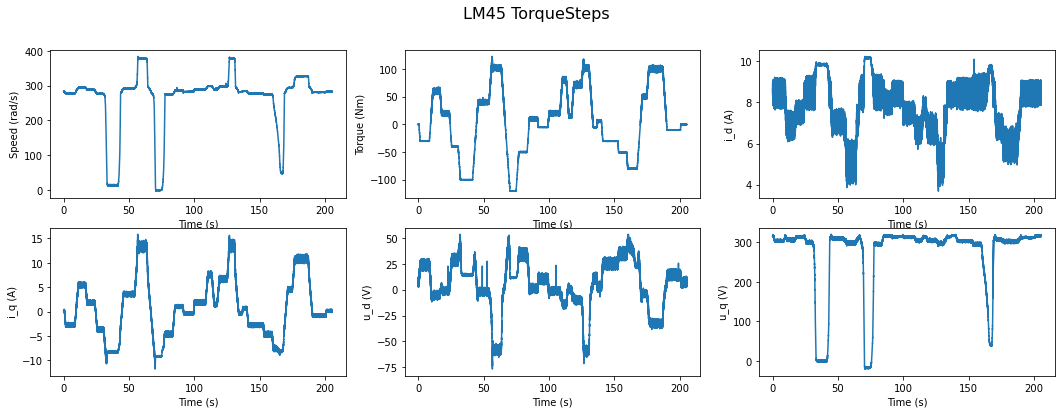

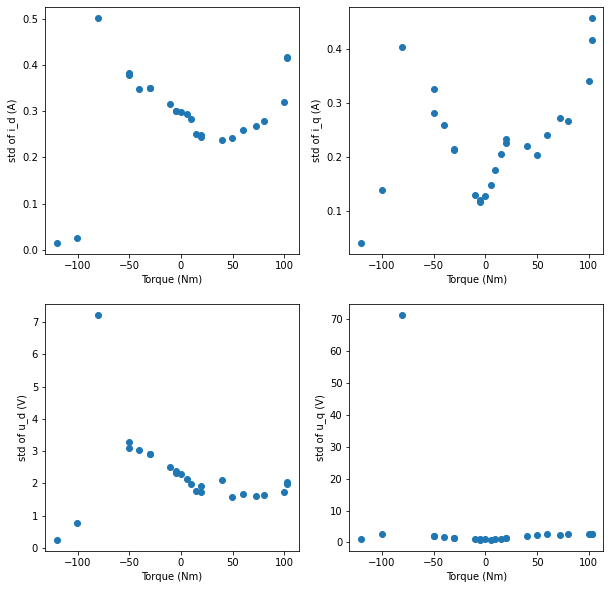

In [42]:
#Constant 45 Hz speed and torque steps

data = data_lm45_torquesteps
statics = statics_lm45_torquesteps
title = 'LM45 TorqueSteps'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm45_torquesteps = np.copy(values)
values_lm45_torquesteps = values_lm45_torquesteps[~np.isnan(values_lm45_torquesteps).any(axis=1)]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

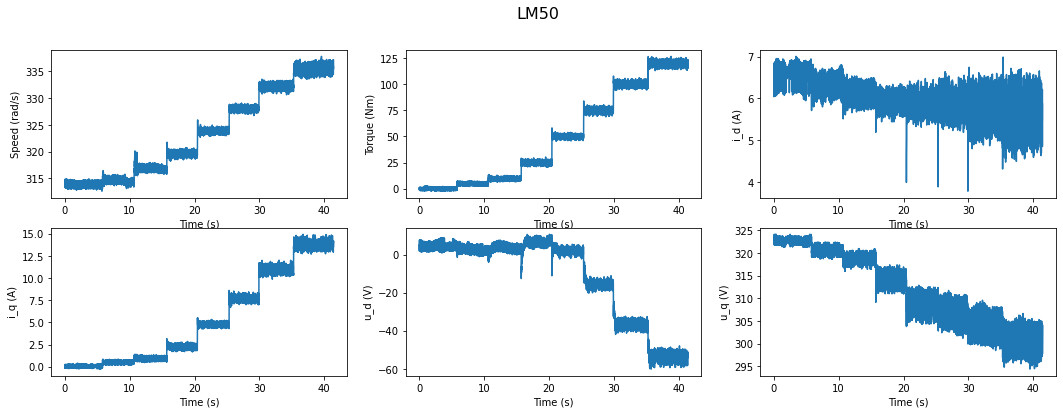

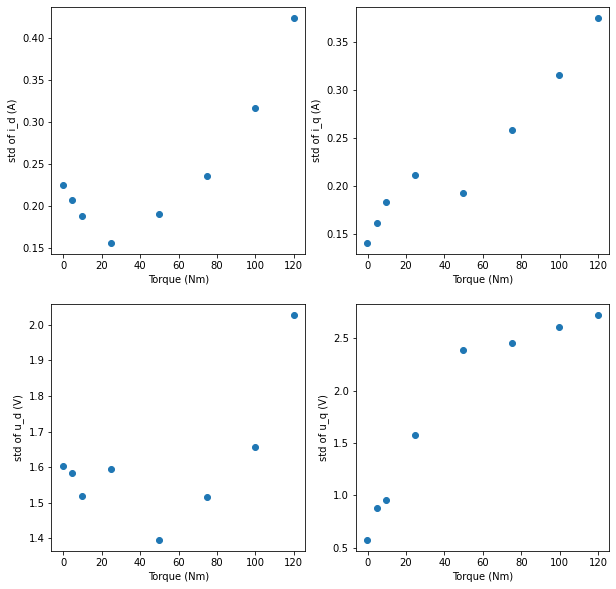

In [43]:
#Constant 50 Hz speed 

data = data_lm50
statics = statics_lm50
title = 'LM50'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm50 = np.copy(values)
values_lm50 = values_lm50[~np.isnan(values_lm50).any(axis=1)]


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

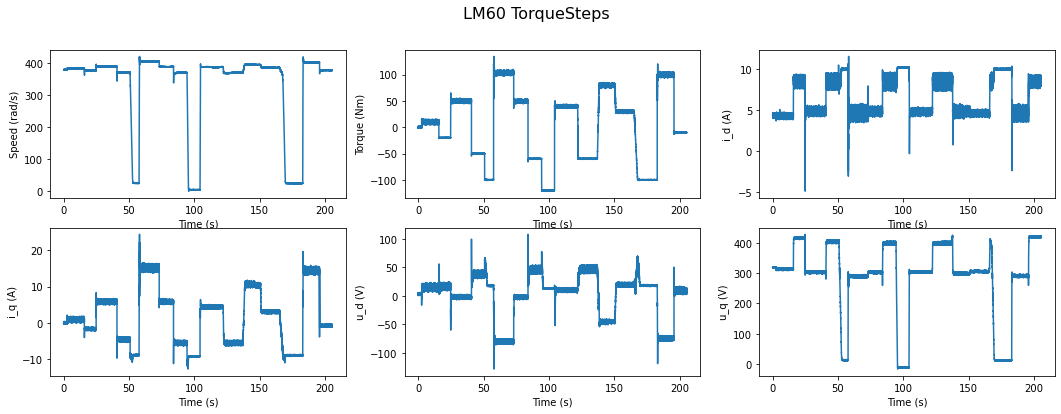

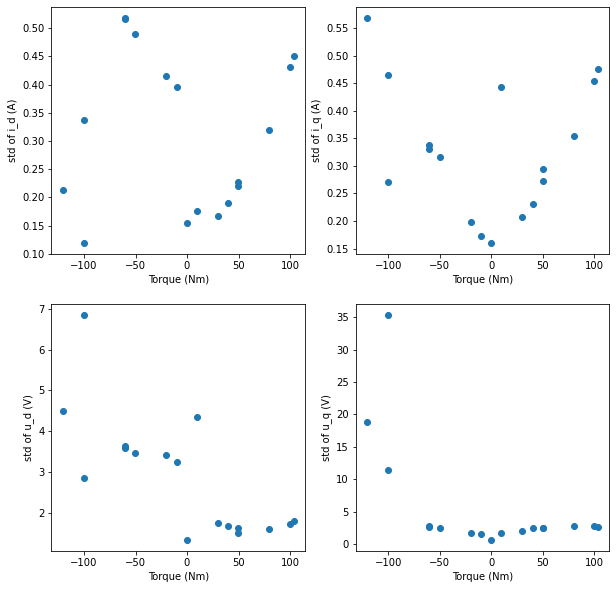

In [44]:
#Constant 60 Hz speed and torque steps

data = data_lm60_torquesteps
statics = statics_lm60_torquesteps
title = 'LM60 TorqueSteps'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm60_torquesteps = np.copy(values)
values_lm60_torquesteps = values_lm60_torquesteps[~np.isnan(values_lm60_torquesteps).any(axis=1)]


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

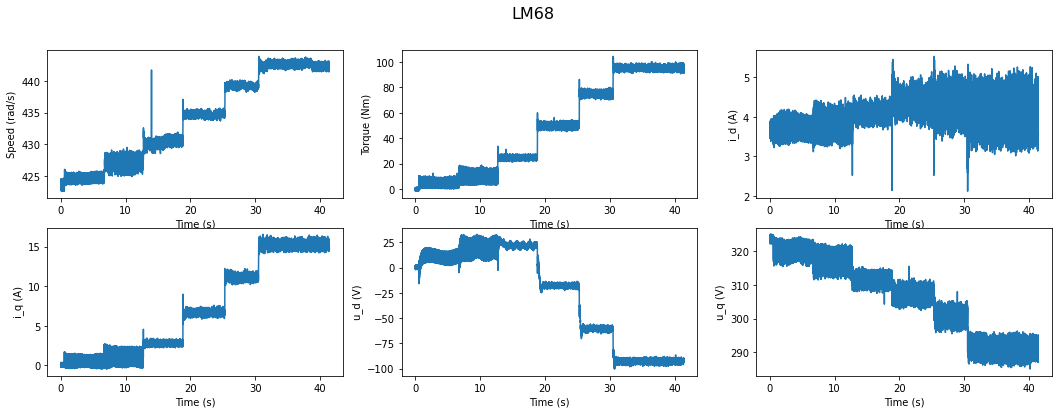

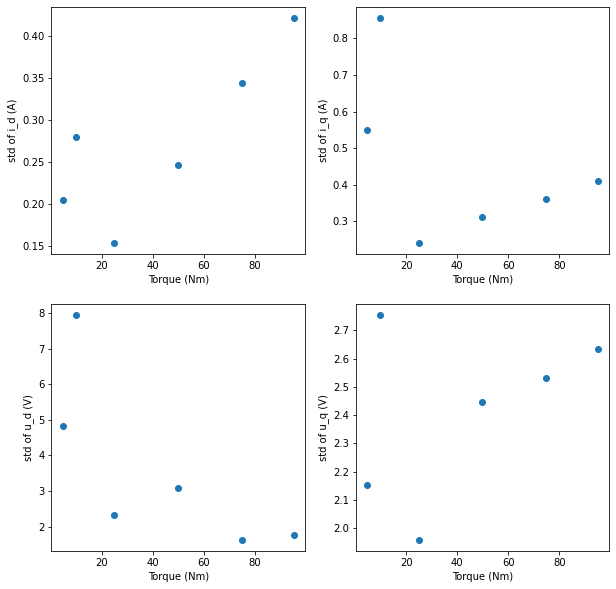

In [45]:
#Constant 68 Hz

data = data_lm68
statics = statics_lm68
title = 'LM68'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(trq[st:et]), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_lm68 = np.copy(values)
values_lm68 = values_lm68[~np.isnan(values_lm68).any(axis=1)]


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.show()

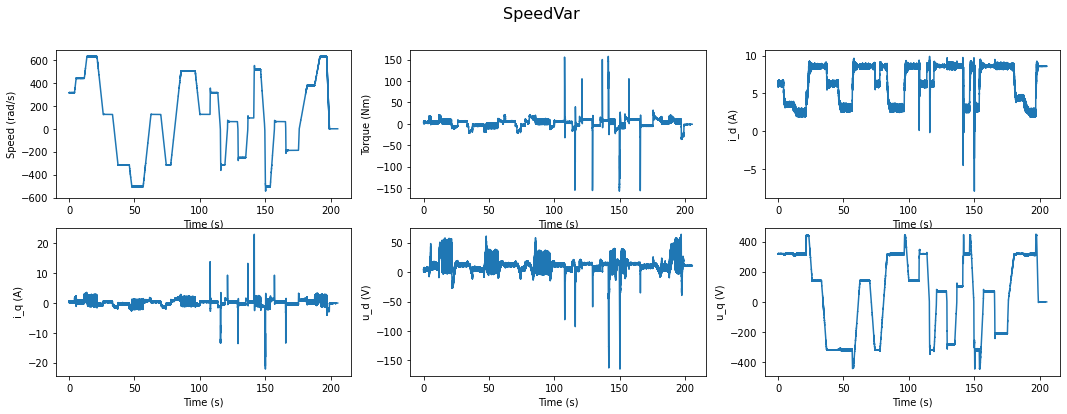

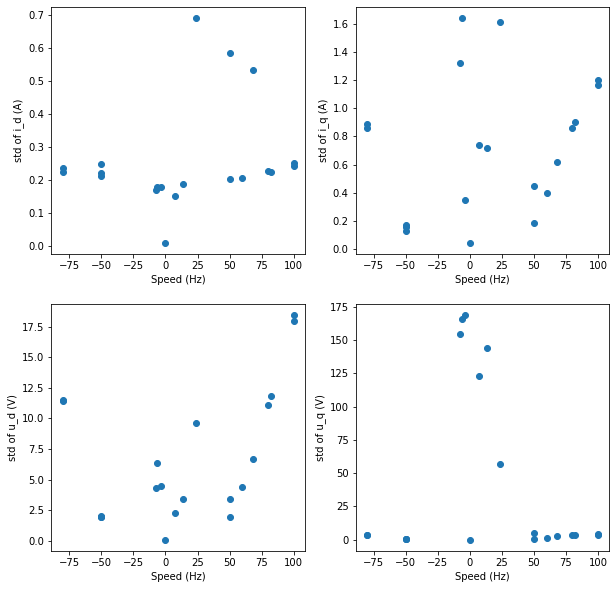

In [48]:
#Constant zero torque and varying speed

data = data_spdvar
statics = statics_spdvar
title = 'SpeedVar'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(spd[st:et]) / (2*np.pi), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_spdvar = np.copy(values)
values_spdvar = values_spdvar[~np.isnan(values_spdvar).any(axis=1)]


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Speed (Hz)')
plt.show()

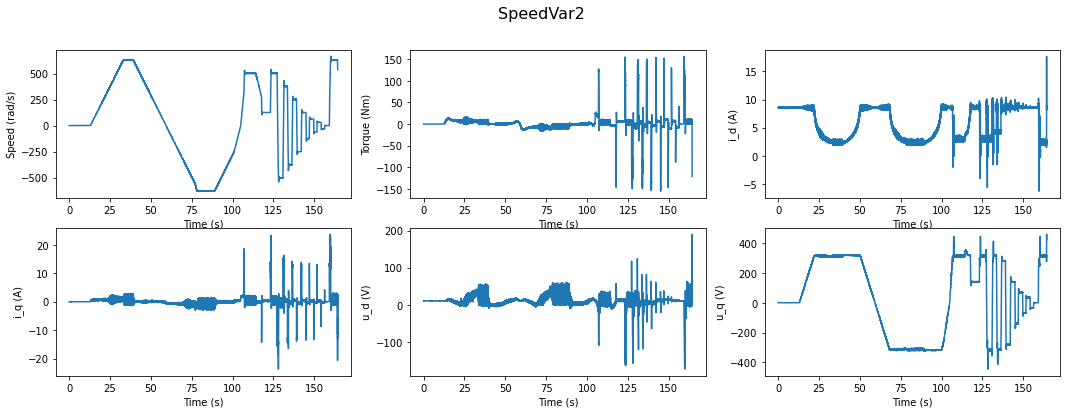

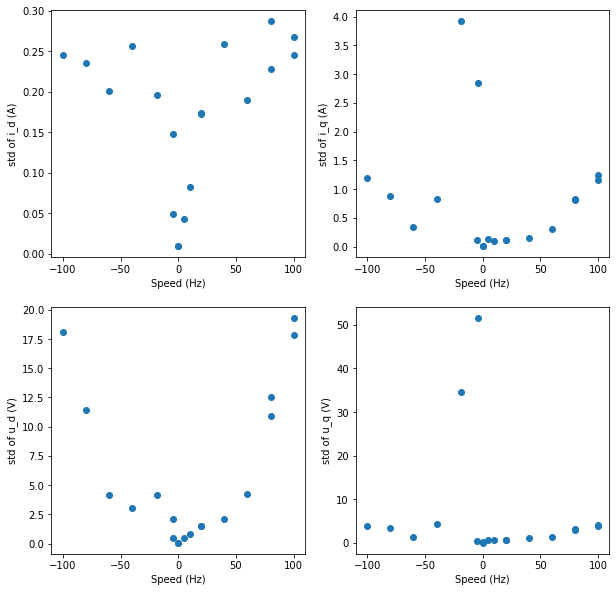

In [53]:
#Constant zero torque and varying speed

data = data_spdvar2
statics = statics_spdvar2
title = 'SpeedVar2'
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.plot(data['time'][0], data['speed'][0])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 2)
plt.plot(data['time'][0], data['torque'][0])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
# plt.xticks(np.arange(0, 45, 2.0))

plt.subplot(2, 3, 3)
plt.plot(data['time'][0], data['current_d'][0])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 4)
plt.plot(data['time'][0], data['current_q'][0])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 5)
plt.plot(data['time'][0], data['voltage_d'][0])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(2, 3, 6)
plt.plot(data['time'][0], data['voltage_q'][0])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.show()

mean_stds = {}

time = data['time'][0]
i_d = data['current_d'][0]
i_q = data['current_q'][0]
u_d = data['voltage_d'][0]
u_q = data['voltage_q'][0]
spd = data['speed'][0]
trq = data['torque'][0]

values = []

for static in statics:
    st = np.where(time > static[0])[0][0]
    et = np.where(time > static[1])[0][0]
    mean_stds[static] = {'id': {'mean': np.mean(i_d[st:et]), 'std': np.std(i_d[st:et])},
                         'iq': {'mean': np.mean(i_q[st:et]), 'std': np.std(i_q[st:et])},
                         'ud': {'mean': np.mean(u_d[st:et]), 'std': np.std(u_d[st:et])},
                         'uq': {'mean': np.mean(u_q[st:et]), 'std': np.std(u_q[st:et])},
                         'trq': {'mean': np.mean(trq[st:et]), 'std': np.std(trq[st:et])},
                         'spd': {'mean': np.mean(spd[st:et]), 'std': np.std(trq[st:et])}}
    
    values.append([np.mean(spd[st:et]) / (2*np.pi), np.std(i_d[st:et]), 
                   np.std(i_q[st:et]), np.std(u_d[st:et]), np.std(u_q[st:et])])
    

values = sorted(values, key=itemgetter(0))
values = np.asarray(values)

values_spdvar2 = np.copy(values)
values_spdvar2 = values_spdvar2[~np.isnan(values_spdvar2).any(axis=1)]


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values[:, 0], values[:, 1])
plt.ylabel('std of i_d (A)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 2)
plt.scatter(values[:, 0], values[:, 2])
plt.ylabel('std of i_q (A)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 3)
plt.scatter(values[:, 0], values[:, 3])
plt.ylabel('std of u_d (V)')
plt.xlabel('Speed (Hz)')

plt.subplot(2, 2, 4)
plt.scatter(values[:, 0], values[:, 4])
plt.ylabel('std of u_q (V)')
plt.xlabel('Speed (Hz)')
plt.show()

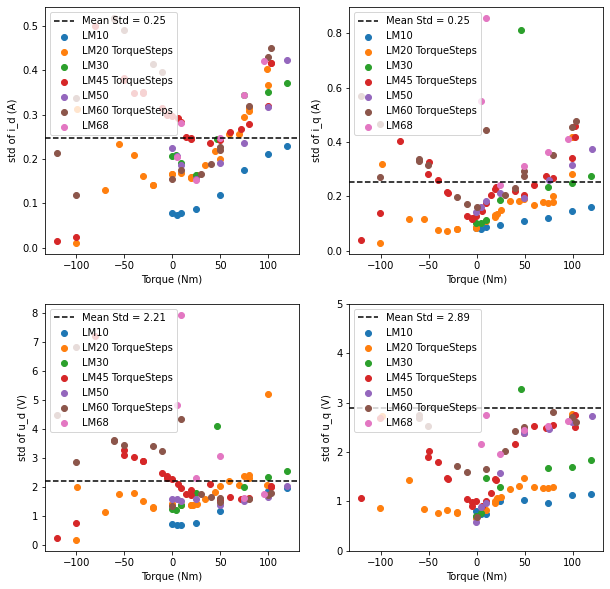

In [54]:
means = np.mean(np.stack((np.nanmean(values_lm10, axis=0),  np.nanmean(values_lm20_torquesteps, axis=0),
          np.nanmean(values_lm30, axis=0),  np.nanmean(values_lm45_torquesteps, axis=0),
          np.nanmean(values_lm50, axis=0),  np.nanmean(values_lm60_torquesteps, axis=0),
          np.nanmean(values_lm68, axis=0))), axis=0)

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(values_lm10[:, 0],             values_lm10[:, 1],             label='LM10')
plt.scatter(values_lm20_torquesteps[:, 0], values_lm20_torquesteps[:, 1], label='LM20 TorqueSteps')
plt.scatter(values_lm30[:, 0],             values_lm30[:, 1],             label='LM30')
plt.scatter(values_lm45_torquesteps[:, 0], values_lm45_torquesteps[:, 1], label='LM45 TorqueSteps')
plt.scatter(values_lm50[:, 0],             values_lm50[:, 1],             label='LM50')
plt.scatter(values_lm60_torquesteps[:, 0], values_lm60_torquesteps[:, 1], label='LM60 TorqueSteps')
plt.scatter(values_lm68[:, 0],             values_lm68[:, 1],             label='LM68')
plt.axhline(y=means[1], color='black', linestyle='--', label="Mean Std = {:.2f}".format(means[1]))
plt.legend()
plt.ylabel('std of i_d (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 2)
plt.scatter(values_lm10[:, 0],             values_lm10[:, 2],             label='LM10')
plt.scatter(values_lm20_torquesteps[:, 0], values_lm20_torquesteps[:, 2], label='LM20 TorqueSteps')
plt.scatter(values_lm30[:, 0],             values_lm30[:, 2],             label='LM30')
plt.scatter(values_lm45_torquesteps[:, 0], values_lm45_torquesteps[:, 2], label='LM45 TorqueSteps')
plt.scatter(values_lm50[:, 0],             values_lm50[:, 2],             label='LM50')
plt.scatter(values_lm60_torquesteps[:, 0], values_lm60_torquesteps[:, 2], label='LM60 TorqueSteps')
plt.scatter(values_lm68[:, 0],             values_lm68[:, 2],             label='LM68')
plt.axhline(y=means[2], color='black', linestyle='--', label="Mean Std = {:.2f}".format(means[2]))
plt.legend()
plt.ylabel('std of i_q (A)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 3)
plt.scatter(values_lm10[:, 0],             values_lm10[:, 3],             label='LM10')
plt.scatter(values_lm20_torquesteps[:, 0], values_lm20_torquesteps[:, 3], label='LM20 TorqueSteps')
plt.scatter(values_lm30[:, 0],             values_lm30[:, 3],             label='LM30')
plt.scatter(values_lm45_torquesteps[:, 0], values_lm45_torquesteps[:, 3], label='LM45 TorqueSteps')
plt.scatter(values_lm50[:, 0],             values_lm50[:, 3],             label='LM50')
plt.scatter(values_lm60_torquesteps[:, 0], values_lm60_torquesteps[:, 3], label='LM60 TorqueSteps')
plt.scatter(values_lm68[:, 0],             values_lm68[:, 3],             label='LM68')
plt.axhline(y=means[3], color='black', linestyle='--', label="Mean Std = {:.2f}".format(means[3]))
plt.legend()
plt.ylabel('std of u_d (V)')
plt.xlabel('Torque (Nm)')

plt.subplot(2, 2, 4)
plt.scatter(values_lm10[:, 0],             values_lm10[:, 4],             label='LM10')
plt.scatter(values_lm20_torquesteps[:, 0], values_lm20_torquesteps[:, 4], label='LM20 TorqueSteps')
plt.scatter(values_lm30[:, 0],             values_lm30[:, 4],             label='LM30')
plt.scatter(values_lm45_torquesteps[:, 0], values_lm45_torquesteps[:, 4], label='LM45 TorqueSteps')
plt.scatter(values_lm50[:, 0],             values_lm50[:, 4],             label='LM50')
plt.scatter(values_lm60_torquesteps[:, 0], values_lm60_torquesteps[:, 4], label='LM60 TorqueSteps')
plt.scatter(values_lm68[:, 0],             values_lm68[:, 4],             label='LM68')
plt.axhline(y=means[4], color='black', linestyle='--', label="Mean Std = {:.2f}".format(means[4]))
plt.legend()
plt.ylabel('std of u_q (V)')
plt.xlabel('Torque (Nm)')
plt.ylim(0, 5)

plt.savefig('std_noise_torque_constantspeed.pdf', dpi=500, bbox='tight')

In [140]:
import pickle as pkl 



In [141]:
train_sample = '../../../datasets/Data_23042020/train/00000.pkl'
fin = open(train_sample, 'rb')
data = pkl.load(fin)

In [142]:
data.keys()

dict_keys(['voltage_d', 'voltage_q', 'current_d', 'current_q', 'torque', 'speed', 'statorPuls', 'time', 'reference_torque_interp', 'reference_speed_interp', 'reference_torque', 'reference_speed', 'torque_time', 'speed_time'])

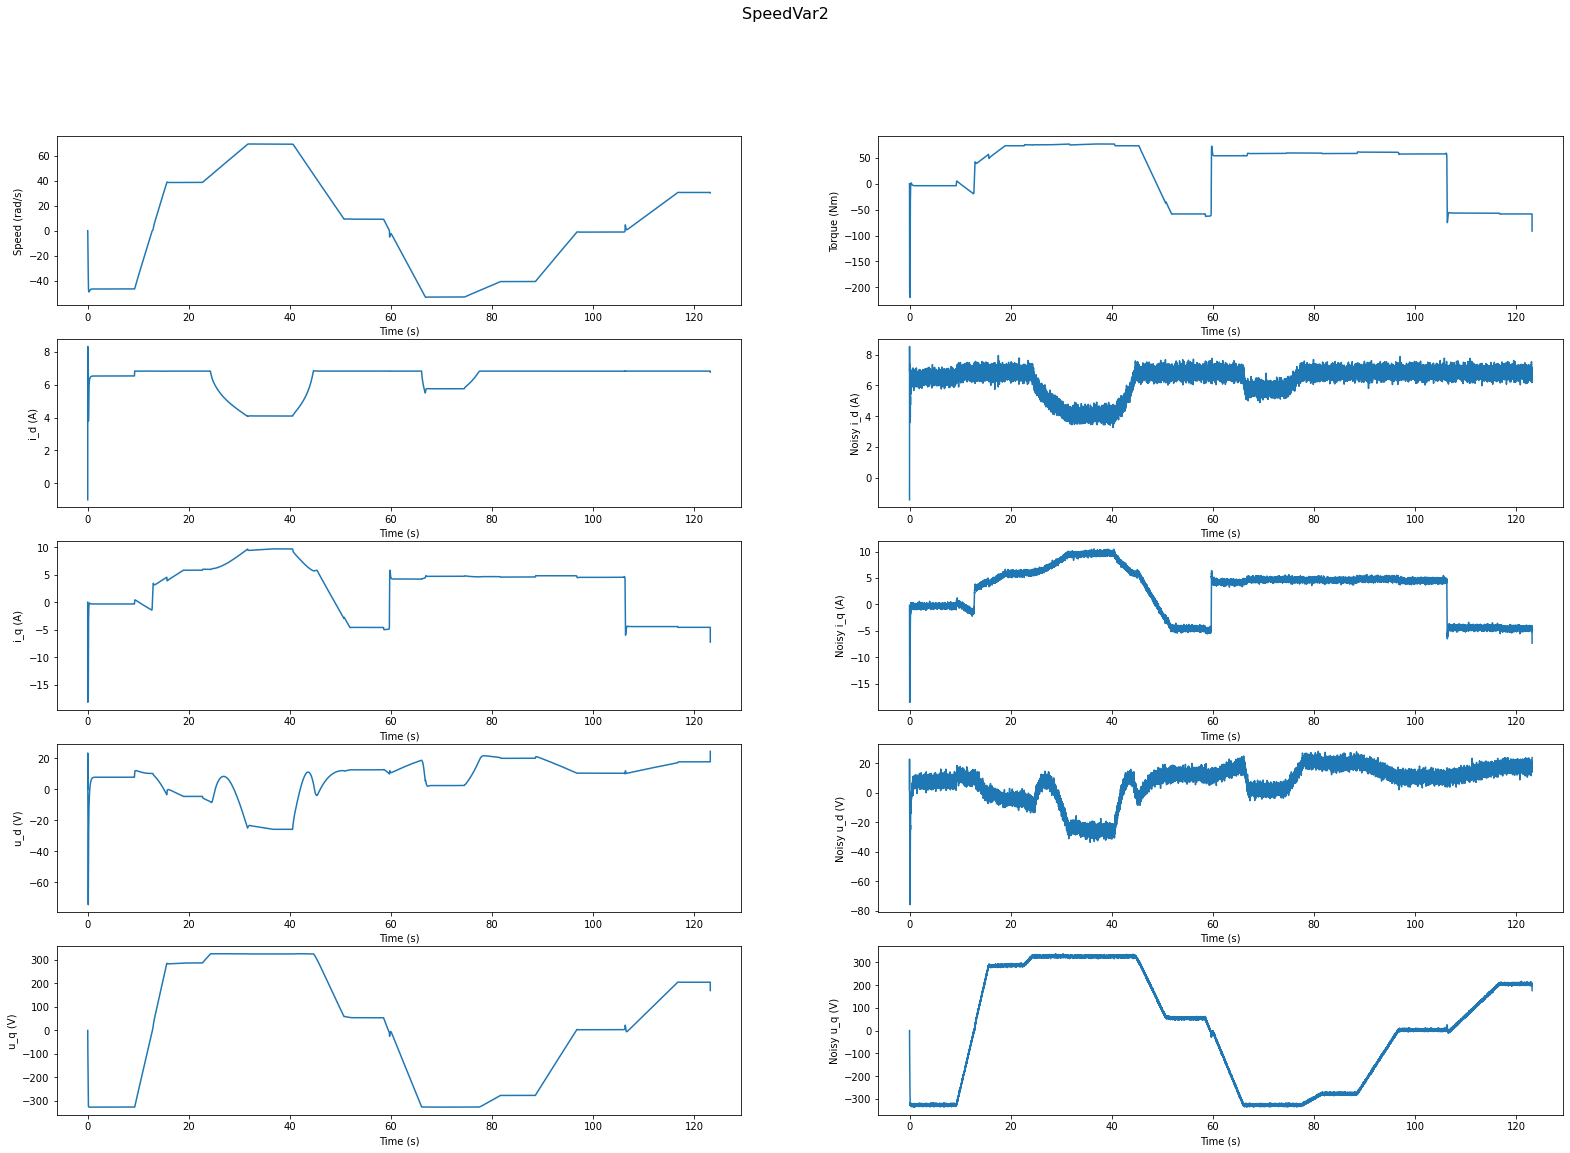

In [143]:
fig = plt.figure(figsize=(27,18))

plt.subplot(5, 2, 1)
plt.plot(data['time'], data['speed'])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 2)
plt.plot(data['time'], data['torque'])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 3)
plt.plot(data['time'], data['current_d'])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 4)
plt.plot(data['time'], np.random.normal(data['current_d'], scale=means[1]))
plt.ylabel('Noisy i_d (A)')
plt.xlabel('Time (s)')


plt.subplot(5, 2, 5)
plt.plot(data['time'], data['current_q'])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 6)
plt.plot(data['time'], np.random.normal(data['current_q'], scale=means[2]))
plt.ylabel('Noisy i_q (A)')
plt.xlabel('Time (s)')


plt.subplot(5, 2, 7)
plt.plot(data['time'], data['voltage_d'])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 8)
plt.plot(data['time'], np.random.normal(data['voltage_d'], scale=means[3]))
plt.ylabel('Noisy u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 9)
plt.plot(data['time'], data['voltage_q'])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 10)
plt.plot(data['time'], np.random.normal(data['voltage_q'], scale=means[4]))
plt.ylabel('Noisy u_q (V)')
plt.xlabel('Time (s)')

fig.suptitle(title, fontsize=16)
plt.savefig('noise_added_to_train_sample.pdf', dpi=500, bbox='tight')

In [78]:
X_train = np.stack([[10] * values_lm10.shape[0], values_lm10[:,0]], axis=1)
y_id_train = values_lm10[:,1]
y_iq_train = values_lm10[:,2]
y_ud_train = values_lm10[:,3]
y_uq_train = values_lm10[:,4]

X_test = np.stack([[30] * values_lm30.shape[0], values_lm30[:,0]], axis=1)
y_id_test = values_lm30[:,1]
y_iq_test = values_lm30[:,2]
y_ud_test = values_lm30[:,3]
y_uq_test = values_lm30[:,4]


X_train = np.vstack([X_train, np.stack([[45] * values_lm45_torquesteps.shape[0], values_lm45_torquesteps[:,0]], axis=1)])
y_id_train = np.hstack([y_id_train, values_lm45_torquesteps[:,1]])
y_iq_train = np.hstack([y_iq_train, values_lm45_torquesteps[:,2]])
y_ud_train = np.hstack([y_ud_train, values_lm45_torquesteps[:,3]])
y_uq_train = np.hstack([y_uq_train, values_lm45_torquesteps[:,4]])


X_train = np.vstack([X_train, np.stack([[50] * values_lm50.shape[0], values_lm50[:,0]], axis=1)])
y_id_train = np.hstack([y_id_train, values_lm50[:,1]])
y_iq_train = np.hstack([y_iq_train, values_lm50[:,2]])
y_ud_train = np.hstack([y_ud_train, values_lm50[:,3]])
y_uq_train = np.hstack([y_uq_train, values_lm50[:,4]])


X_train = np.vstack([X_train, np.stack([[60] * values_lm60_torquesteps.shape[0], values_lm60_torquesteps[:,0]], axis=1)])
y_id_train = np.hstack([y_id_train, values_lm60_torquesteps[:,1]])
y_iq_train = np.hstack([y_iq_train, values_lm60_torquesteps[:,2]])
y_ud_train = np.hstack([y_ud_train, values_lm60_torquesteps[:,3]])
y_uq_train = np.hstack([y_uq_train, values_lm60_torquesteps[:,4]])

X_test = np.vstack([X_test, np.stack([[68] * values_lm68.shape[0], values_lm68[:,0]], axis=1)])
y_id_test = np.hstack([y_id_test, values_lm68[:,1]])
y_iq_test = np.hstack([y_iq_test, values_lm68[:,2]])
y_ud_test = np.hstack([y_ud_test, values_lm68[:,3]])
y_uq_test = np.hstack([y_uq_test, values_lm68[:,4]])


X_train = np.vstack([X_train, np.stack([values_spdvar[:,0], [0] * values_spdvar.shape[0]], axis=1)])
y_id_train = np.hstack([y_id_train, values_spdvar[:,1]])
y_iq_train = np.hstack([y_iq_train, values_spdvar[:,2]])
y_ud_train = np.hstack([y_ud_train, values_spdvar[:,3]])
y_uq_train = np.hstack([y_uq_train, values_spdvar[:,4]])

X_train = np.vstack([X_train, np.stack([values_spdvar2[:,0], [0] * values_spdvar2.shape[0]], axis=1)])
y_id_train = np.hstack([y_id_train, values_spdvar2[:,1]])
y_iq_train = np.hstack([y_iq_train, values_spdvar2[:,2]])
y_ud_train = np.hstack([y_ud_train, values_spdvar2[:,3]])
y_uq_train = np.hstack([y_uq_train, values_spdvar2[:,4]])

In [79]:
print (X_train.shape, y_id_train.shape, y_iq_train.shape, y_ud_train.shape, y_uq_train.shape)
print (X_test.shape, y_id_test.shape, y_iq_test.shape, y_ud_test.shape, y_uq_test.shape)



(97, 2) (97,) (97,) (97,) (97,)
(14, 2) (14,) (14,) (14,) (14,)


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [191]:
reg_id = LinearRegression().fit(X_train, y_id_train)
print ('Coef: ', 'Speed =', reg_id.coef_[0], ' Torque =', reg_id.coef_[1])
print ('Intercept: ', reg_id.intercept_)
pred_id_test = reg_id.predict(X_test)

print ("MAE i_d: ", mae(pred_id_test, y_id_test))
print ("MSE i_d: ", mse(pred_id_test, y_id_test))

print ('Train')
pred_id_test = reg_id.predict(X_train)
print ("MAE i_d: ", mae(pred_id_test, y_id_train))
print ("MSE i_d: ", mse(pred_id_test, y_id_train))

Coef:  Speed = 0.0009288132954952615  Torque = 0.00019727062734832288
Intercept:  0.2170221330349179
MAE i_d:  0.06580859511232637
MSE i_d:  0.005765509137213195
Train
MAE i_d:  0.0961028520636806
MSE i_d:  0.015188310971454207


In [200]:
i = 20
x = X_train[i]
print ('Speed', x[0], 'Torque', x[1])
print ('id pred', reg_id.predict([x]),'id true', y_id_train[i])

Speed 45.0 Torque 5.698738072864611
id pred [0.25994292] id true 0.2932308448439264


In [82]:
reg_iq = LinearRegression().fit(X_train, y_iq_train)
print ('Coef: ', 'Speed =', reg_iq.coef_[0], ' Torque =', reg_iq.coef_[1])
print ('Intercept: ', reg_iq.intercept_)
pred_iq_test = reg_iq.predict(X_test)

print ("MAE i_q: ", mae(pred_iq_test, y_iq_test))
print ("MSE i_q: ", mse(pred_iq_test, y_iq_test))

Coef:  Speed = -0.0018516289039772697  Torque = -0.0006618613478362043
Intercept:  0.5147059668366339
MAE i_q:  0.21700566248170122
MSE i_q:  0.06576629976006765


In [83]:
reg_ud = LinearRegression().fit(X_train, y_ud_train)
print ('Coef: ', 'Speed =', reg_ud.coef_[0], ' Torque =', reg_ud.coef_[1])
print ('Intercept: ', reg_ud.intercept_)
pred_ud_test = reg_ud.predict(X_test)

print ("MAE u_d: ", mae(pred_ud_test, y_ud_test))
print ("MSE u_d: ", mse(pred_ud_test, y_ud_test))

Coef:  Speed = 0.008434040545049001  Torque = -0.01574986939392153
Intercept:  3.7666885741428517
MAE u_d:  1.5001033867627214
MSE u_d:  3.3500806431424963


In [157]:
reg_uq = LinearRegression().fit(X_train, y_uq_train)
print ('Coef: ', 'Speed =', reg_uq.coef_[0], ' Torque =', reg_uq.coef_[1])
print ('Intercept: ', reg_uq.intercept_)
pred_uq_test = reg_uq.predict(X_test)

print ("MAE u_q: ", mae(pred_uq_test, y_uq_test))
print ("MSE u_q: ", mse(pred_uq_test, y_uq_test))

Coef:  Speed = -0.1563068141382544  Torque = -0.09008192508902613
Intercept:  18.216404653565412
MAE u_q:  5.694046182914525
MSE u_q:  48.900364102439546


In [85]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [184]:
reg_id = make_pipeline(StandardScaler(), SVR(C=2.0, epsilon=2.7, kernel='poly'))
reg_id.fit(X_train, y_id_train)
pred_id_test = reg_id.predict(X_test)

print ("MAE i_d: ", mae(pred_id_test, y_id_test))
print ("MSE i_d: ", mse(pred_id_test, y_id_test))

svr_mod = reg_id.steps[1][1]
print (svr_mod.intercept_)

MAE i_d:  0.09604959374524676
MSE i_d:  0.013485121626762565
[0.34903536]


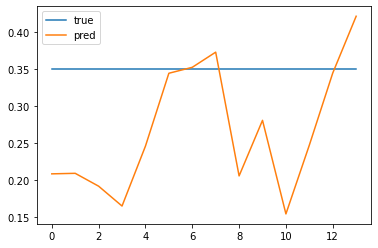

In [188]:
plt.plot(pred_id_test, label='true')
plt.plot(y_id_test, label='pred')
plt.legend()

In [109]:
reg_iq = make_pipeline(StandardScaler(), SVR(C=0.00001, epsilon=0.00001, kernel='poly'))
reg_iq.fit(X_train, y_iq_train)
pred_iq_test = reg_iq.predict(X_test)

print ("MAE i_q: ", mae(pred_iq_test, y_iq_test))
print ("MSE i_q: ", mse(pred_iq_test, y_iq_test))

MAE i_q:  0.16761701565918993
MSE i_q:  0.06118149514075392


In [119]:
reg_ud = make_pipeline(StandardScaler(), SVR(C=0.0000001, epsilon=0.0000001, kernel='poly'))
reg_ud.fit(X_train, y_ud_train)
pred_ud_test = reg_ud.predict(X_test)

print ("MAE u_d: ", mae(pred_ud_test, y_ud_test))
print ("MSE u_d: ", mse(pred_ud_test, y_ud_test))

MAE u_d:  1.1512292932913604
MSE u_d:  3.5902980265717233


In [120]:
reg_uq = make_pipeline(StandardScaler(), SVR(C=0.00001, epsilon=0.00001, kernel='sigmoid'))
reg_uq.fit(X_train, y_uq_train)
pred_uq_test = reg_uq.predict(X_test)

print ("MAE u_q: ", mae(pred_uq_test, y_uq_test))
print ("MSE u_q: ", mse(pred_uq_test, y_uq_test))

MAE u_q:  0.621769019156136
MSE u_q:  0.5642008991411671


array([0.34903536, 0.34903536, 0.34903536, ..., 0.34903536, 0.34903536,
       0.34903536])

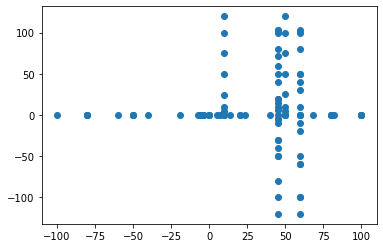

In [97]:
plt.scatter(X_train[:,0], X_train[:, 1])

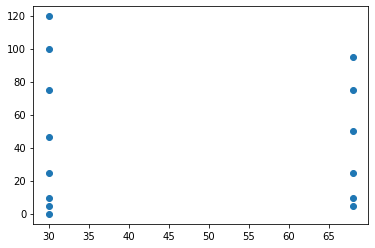

In [96]:
plt.scatter(X_test[:,0], X_test[:, 1])

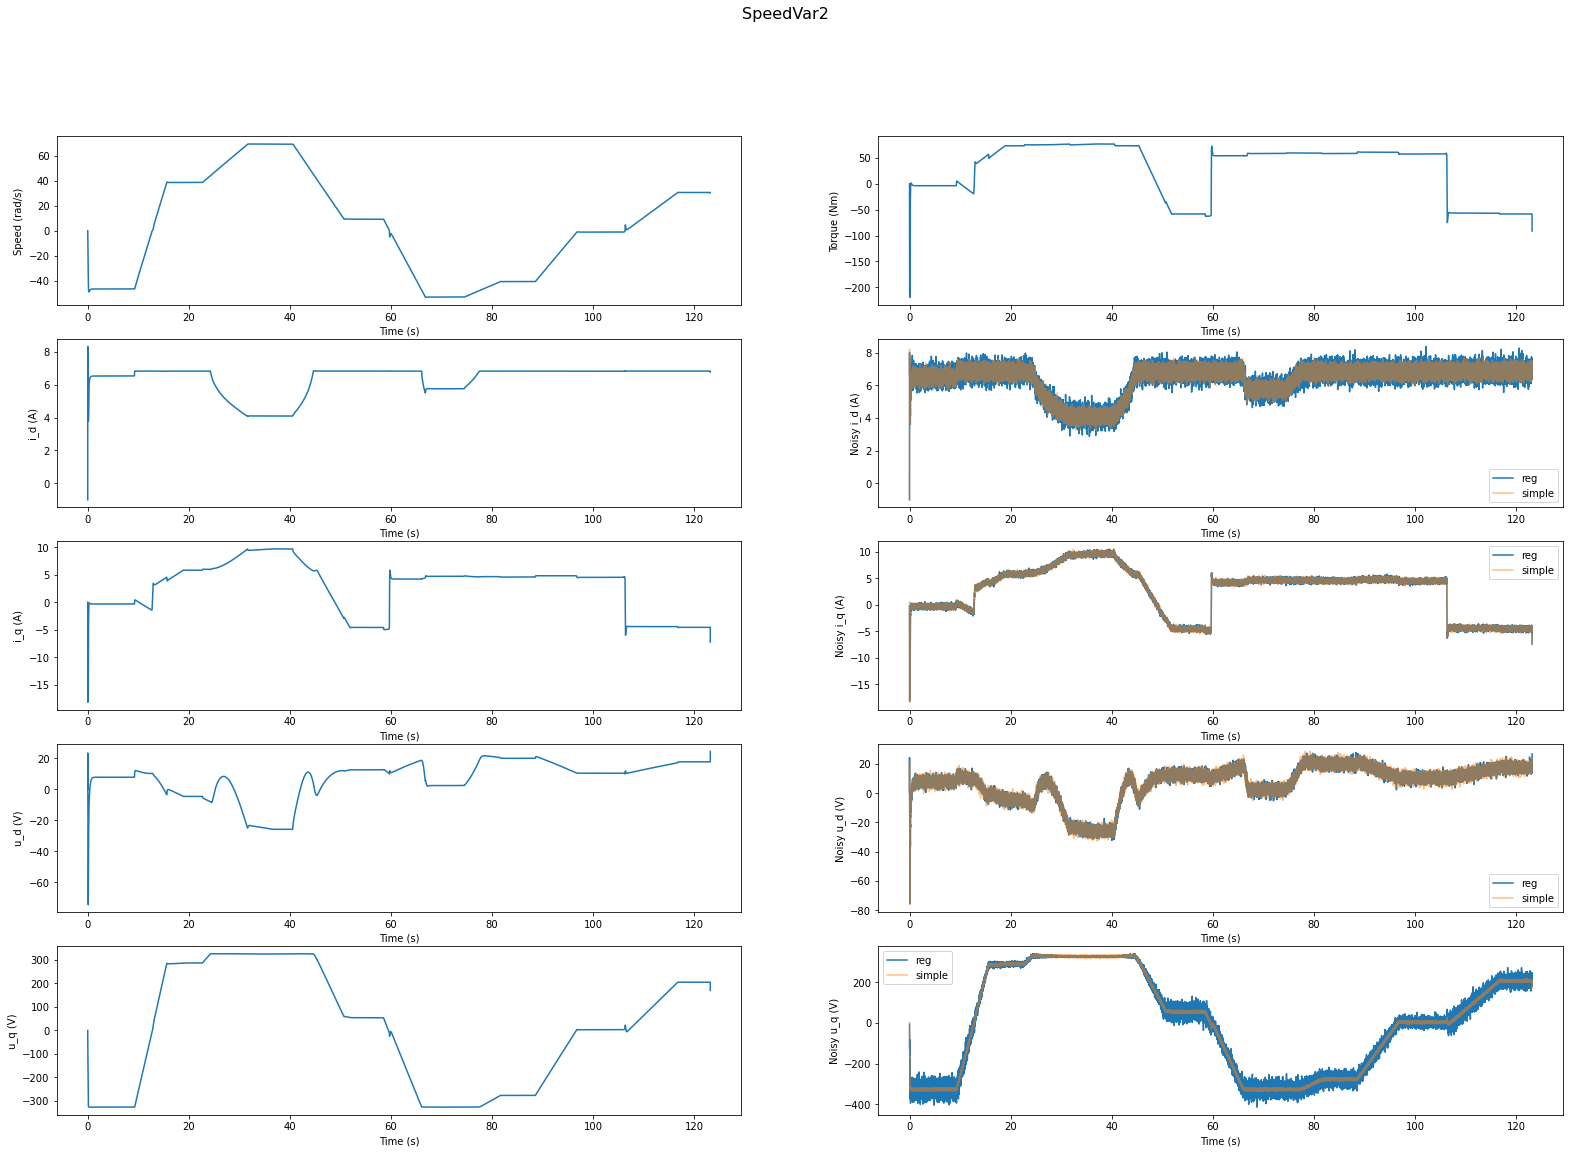

In [156]:
fig = plt.figure(figsize=(27,18))

plt.subplot(5, 2, 1)
plt.plot(data['time'], data['speed'])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 2)
plt.plot(data['time'], data['torque'])
plt.ylabel('Torque (Nm)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 3)
plt.plot(data['time'], data['current_d'])
plt.ylabel('i_d (A)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 4)
plt.plot(data['time'], np.random.normal(data['current_d'], scale=reg_id.predict(np.vstack([data['speed'], data['torque']]).T)), label='reg')
plt.plot(data['time'], np.random.normal(data['current_d'], scale=means[1]), label='simple', alpha=0.5)
plt.ylabel('Noisy i_d (A)')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(5, 2, 5)
plt.plot(data['time'], data['current_q'])
plt.ylabel('i_q (A)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 6)
plt.plot(data['time'], np.random.normal(data['current_q'], scale=reg_iq.predict(np.vstack([data['speed'], data['torque']]).T)), label='reg')
plt.plot(data['time'], np.random.normal(data['current_q'], scale=means[2]), label='simple', alpha=0.5)
plt.ylabel('Noisy i_q (A)')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(5, 2, 7)
plt.plot(data['time'], data['voltage_d'])
plt.ylabel('u_d (V)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 8)
plt.plot(data['time'], np.random.normal(data['voltage_d'], scale=reg_ud.predict(np.vstack([data['speed'], data['torque']]).T)), label='reg')
plt.plot(data['time'], np.random.normal(data['voltage_d'], scale=means[3]), label='simple', alpha=0.5)
plt.ylabel('Noisy u_d (V)')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(5, 2, 9)
plt.plot(data['time'], data['voltage_q'])
plt.ylabel('u_q (V)')
plt.xlabel('Time (s)')

plt.subplot(5, 2, 10)
plt.plot(data['time'], np.random.normal(data['voltage_q'], scale=reg_uq.predict(np.vstack([data['speed'], data['torque']]).T)), label='reg')
plt.plot(data['time'], np.random.normal(data['voltage_q'], scale=means[4]), label='simple', alpha=0.5)
plt.ylabel('Noisy u_q (V)')
plt.xlabel('Time (s)')
plt.legend()

fig.suptitle(title, fontsize=16)
plt.savefig('noise_added_to_train_sample.pdf', dpi=500, bbox='tight')